Pandas is the most popular data analysis library in Python. It is a powerful tool for data manipulation and analysis.

Most of the time, our data is stored as a file on our hard drive. We can read the data into a Pandas DataFrame using pandas functions.

In this example, we will explore the world happiness report data from Kaggle. Learn more about this dataset [here](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021?resource=download).

We are basically doing a less impressive version of [this notebook](https://www.kaggle.com/code/joshuaswords/awesome-eda-2021-happiness-population).

First, let's import pandas. Make sure to install it if you get a `ModuleNotFoundError`.

In [213]:
import pandas as pd # calling pandas 'pd' is standard practice

Now, we can read the data into a DataFrame. We will use the `pd.read_csv` function. It takes two arguments: the path to the file, and the delimiter. 

The file we want to read is called `world_happiness_report.csv` and it's in the `data` folder. Therefore, the path that we want to pass in is `data/world_happiness_report.csv`. Notice that this path is relative to the location of the notebook.

The delimiter has a default value of '`,`', which is what we want, so we don't need t pass it in. 

In [214]:
df = pd.read_csv('data/world-happiness-report.csv')

Dataframes have a bunch of useful methods that we can use to explore the data.

In [215]:
# we can see what the columns are by using the .columns attribute
print("columns:", df.columns)

# we can see the shape of the data using the .shape attribute
print("rows, columns:", df.shape)

columns: Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')
rows, columns: (1949, 11)


In [216]:
# we can get a summary of the data using the describe() method
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [217]:
# The head method displays the first 5 rows of the dataframe.
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [218]:
# The tail method displays the last 5 rows of the dataframe.
df.tail()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1944,Zimbabwe,2016,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,0.716,0.235
1948,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789,0.703,0.346


Let's run a quick analysis to see how life expectancy in Botswana has changed since we started collecting data.

First, let's extract the rows for Botswana. We can do that by indexing the DataFrame with the `Country name` column. We want rows where the value of the `Country name` column is `Botswana`, so we can use the `==` operator. This gets all of the row indexes where the value of the `Country name` column is `Botswana`.

In [219]:
botswana_df = df[df['Country name'] == 'Botswana']
botswana_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
206,Botswana,2006,4.739,9.492,0.883,46.82,0.824,-0.195,0.723,0.688,0.226
207,Botswana,2008,5.451,9.590,0.832,49.86,0.858,-0.164,0.806,0.731,0.218
208,Botswana,2010,3.553,9.556,0.866,52.90,0.826,-0.143,0.814,0.690,0.172
209,Botswana,2011,3.520,9.600,0.860,53.68,0.813,-0.250,0.816,0.739,0.160
210,Botswana,2012,4.836,9.632,0.837,54.46,0.799,-0.203,0.814,0.773,0.171
211,Botswana,2013,4.128,9.728,0.856,55.24,0.767,-0.154,0.749,0.698,0.244
212,Botswana,2014,4.031,9.756,0.859,56.02,0.791,-0.105,0.743,0.674,0.245
213,Botswana,2015,3.762,9.724,0.816,56.80,0.857,-0.116,0.860,0.746,0.261
214,Botswana,2016,3.499,9.748,0.768,57.50,0.852,-0.253,0.729,0.686,0.252
215,Botswana,2017,3.505,9.756,0.768,58.20,0.817,-0.248,0.731,0.656,0.276


Now let's plot it using seaborn. Don't forget to import seaborn first.

We want to plot `Healthy life expectancy at birth` as our y-axis and `year` as our x-axis. We can do this using the `sns.lineplot` function. We pass in the dataframe, the x-axis column, and the y-axis column.

<AxesSubplot:xlabel='year', ylabel='Healthy life expectancy at birth'>

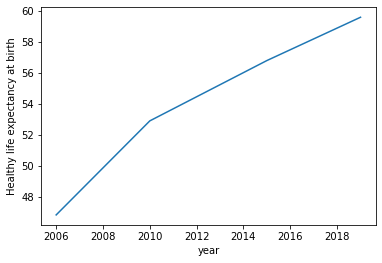

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt # used later for plt.show()

# seaborn has a .lineplot method
# this method takes a dataframe in it's 'data' argument
# we can also pass an x and y axis to the method, using names from the df

sns.lineplot(x="year", y="Healthy life expectancy at birth", data=botswana_df)

Note that pandas also has a `.plot` method that can be used to plot dataframes very quickly.

<AxesSubplot:xlabel='year'>

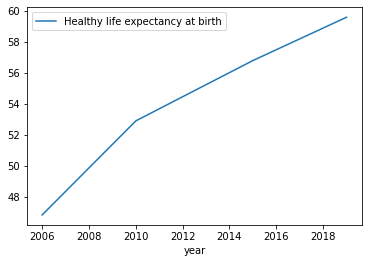

In [221]:
botswana_df.plot(x="year", y="Healthy life expectancy at birth")

We can use this method to plot average life expectancy over time globally as well.

First, however, we need to create a column for average life expectancy. We can do this by using the `.mean` method on the `Healthy ife expectancy at birth` column.

year
2005    67.007407
2006    60.147500
2007    61.305267
2008    61.249954
2009    62.418928
2010    63.069025
2011    62.212121
2012    63.216993
2013    63.326481
2014    63.295950
2015    63.665072
2016    63.860036
2017    64.090231
2018    64.555377
2019    65.003914
2020    67.099565
Name: Healthy life expectancy at birth, dtype: float64


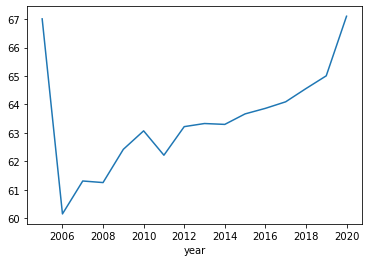

In [222]:
# first use the .groupby method to group the data by 'year'
df_by_year = df.groupby('year')

# the .mean method returns the mean of each column in the group
means = df_by_year['Healthy life expectancy at birth'].mean()

# plot it!
means.plot(x="year", y="Healthy life expectancy at birth")
print(means)

Hopefully, you can see how easy it is to explore data using pandas!

Let's try a more complex analysis, exploring `Positive affect` and `Perceptions of corruption`. First let's naively plot these two columns. We can do this by using the `sns.lineplot` function, put the dataframe in the `data` argument, and pass in the `Perceptions of corruption` column as the x-axis and the `Positive affect` as the y-axis.

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Positive affect'>

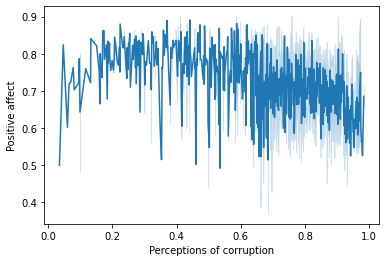

In [223]:
sns.lineplot(x="Perceptions of corruption", y="Positive affect", data=df)

Looks like there might be a trend, but a lineplot is probably not the best for this. Let's try a scatterplot with linear regression. Seaborn has a function called regplot that can do this.

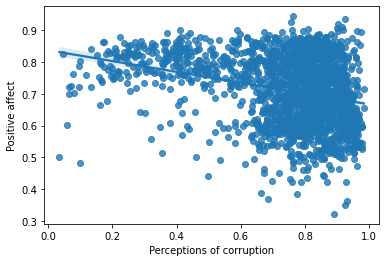

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Positive affect'>

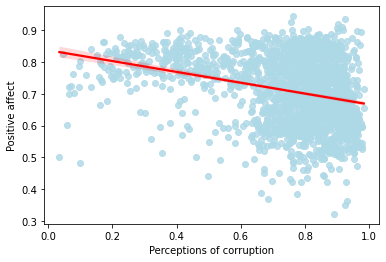

In [224]:
sns.regplot(x="Perceptions of corruption", y="Positive affect", data=df)
plt.show()

# this is hard to read, so let's try separating the colors
# btw, I didn't know how to do this, so I googled it and found this answer:
# https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplothttps://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot
sns.regplot(x="Perceptions of corruption", y="Positive affect", data=df, scatter_kws={"color": "lightblue"}, line_kws={"color": "red"})

The linear regression makes the trend much more clear, but is this correlation statistically significant?

Let's find out using pandas and a new package called `scipy`.

Before running any analysis, let's make sure that the data is cleaned. In this case, our data has values that are set to NaN (not a number).

In [225]:
# are there are nan?
num_nan = df.isna().sum()
print("\tNumber of NaN by Column")
print(num_nan)

	Number of NaN by Column
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64


Looks like we are missing a lot of data, especially in the perceptions of corruption column. For now, let's remove the rows with missing values. We can do this by using the `dropna` function.

Depending on your analysis, you may wan't to fill in this data with another value. There is a `fillna` function to do this.

In [226]:
cleaned_df = df.dropna()

In [227]:
corruption = cleaned_df['Perceptions of corruption']
positive_affect = cleaned_df['Positive affect']

# pandas has a .corr method which will give us the correlation between two columns,
# but not the p-value
r = positive_affect.corr(corruption, method='pearson')
print("pandas pearson correlation:", r)

pandas pearson correlation: -0.3013832737555704


That works fine, but we want the statistical significance as well. Let's use the `scipy` package to do this.

In [228]:
# we can use scipy to calculate the significance of the correlation
# import scipy.stats
import scipy.stats

# use scipy.stats.personr to calculate the correlation
r, p = scipy.stats.pearsonr(positive_affect, corruption)
print("scipy pearson correlation:", r, "p-value:", p)


alpha = 0.05
if p < alpha:
    print("The correlation is significant!")
else:
    print("The correlation is not significant!")

scipy pearson correlation: -0.3013832737555705 p-value: 3.3710203179636876e-37
The correlation is significant!



More info on correlation in python https://realpython.com/numpy-scipy-pandas-correlation-python/

Maybe we want to see all of the correlations between the variables. We can use the `corr` function to do this.

In [229]:
correlation_matrix = df.corr()
print("Correlation Matrix")
correlation_matrix

Correlation Matrix


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


What about the significance of these correlations? Let's use `scipy` again. Here's an example of a function that can do this.

In [230]:
# taken from: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [231]:
p_values = calculate_pvalues(df) 
p_values

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,0.0,0.0081,0.0001,0.669,0.0,0.0,0.1421,0.0,0.4457,0.0
Life Ladder,0.0081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Log GDP per capita,0.0001,0.0,0.0,0.0,0.0,0.0,0.3103,0.0,0.0,0.0
Social support,0.669,0.0,0.0,0.0,0.0,0.0,0.0203,0.0,0.0,0.0
Healthy life expectancy at birth,0.0,0.0,0.0,0.0,0.0,0.0,0.4525,0.0,0.0,0.0
Freedom to make life choices,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Generosity,0.1421,0.0,0.3103,0.0203,0.4525,0.0,0.0,0.0,0.0,0.0001
Perceptions of corruption,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Positive affect,0.4457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Negative affect,0.0,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.0,0.0


Some more complicated code to show a nice table of correlations with significance

In [232]:
from scipy.stats import pearsonr
import numpy as np

significance_levels = [0.01, 0.05, 0.1]

x = corruption
y = positive_affect
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
significance = pval.applymap(lambda x: ''.join(['*' for t in significance_levels if x<=t]))
rho.round(2).astype(str) + significance

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.0***,0.04,0.08***,-0.01,0.16***,0.22***,-0.04*,-0.08***,-0.0,0.2***
Life Ladder,0.04,1.0***,0.79***,0.71***,0.74***,0.53***,0.19***,-0.43***,0.53***,-0.3***
Log GDP per capita,0.08***,0.79***,1.0***,0.69***,0.85***,0.37***,-0.0,-0.35***,0.3***,-0.21***
Social support,-0.01,0.71***,0.69***,1.0***,0.62***,0.41***,0.07***,-0.22***,0.43***,-0.4***
Healthy life expectancy at birth,0.16***,0.74***,0.85***,0.62***,1.0***,0.39***,0.02,-0.32***,0.32***,-0.14***
Freedom to make life choices,0.22***,0.53***,0.37***,0.41***,0.39***,1.0***,0.33***,-0.49***,0.61***,-0.27***
Generosity,-0.04*,0.19***,-0.0,0.07***,0.02,0.33***,1.0***,-0.29***,0.36***,-0.09***
Perceptions of corruption,-0.08***,-0.43***,-0.35***,-0.22***,-0.32***,-0.49***,-0.29***,1.0***,-0.3***,0.26***
Positive affect,-0.0,0.53***,0.3***,0.43***,0.32***,0.61***,0.36***,-0.3***,1.0***,-0.37***
Negative affect,0.2***,-0.3***,-0.21***,-0.4***,-0.14***,-0.27***,-0.09***,0.26***,-0.37***,1.0***
